In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

1.1.5
1.19.1


In [2]:
df_raw_covidcase = pd.read_csv("raw/COVID-19_aantallen_gemeente_per_dag.csv", error_bad_lines=False, sep=';')
df_raw_wastewater = pd.read_csv("raw/COVID-19_rioolwaterdata.csv", error_bad_lines=False, sep=';')
df_raw_vaccines = pd.read_csv("raw/vaccines_administered_nl.csv", error_bad_lines=False)
df_raw_tests = pd.read_csv('raw/COVID-19_uitgevoerde_testen.csv',error_bad_lines=False,sep=';')
df_variant = pd.read_csv('raw/COVID-19_varianten.csv',error_bad_lines=False,sep=';')

In [3]:
df_variant.head()

,Version,Date_of_report,Date_of_statistics_week_start,Variant_code,Variant_name,ECDC_category,WHO_category,May_include_samples_listed_before,Sample_size,Variant_cases
0,3,2022-03-10 10:48:49,2020-11-30,B.1.351,Beta,VOC,VOC,False,75,0
1,3,2022-03-10 10:48:49,2020-11-30,P.1,Gamma,VOC,VOC,False,75,0
2,3,2022-03-10 10:48:49,2020-11-30,B.1.617.2,Delta,VOC,VOC,False,75,0
3,3,2022-03-10 10:48:49,2020-11-30,B.1.1.529,Omicron,VOC,VOC,False,75,0
4,3,2022-03-10 10:48:49,2020-11-30,B.1.640,NaN,VUM,VUM,False,75,0


In [4]:
df_raw_wastewater.head()

,Version,Date_of_report,Date_measurement,RWZI_AWZI_code,RWZI_AWZI_name,RNA_flow_per_100000
0,2,2022-03-02,2020-03-30,32002,Tilburg,34621959326395
1,2,2022-03-02,2020-03-31,3010,Assen,41199039310795
2,2,2022-03-02,2020-03-31,1033,Garmerwolde,10473596079208
3,2,2022-03-02,2020-03-31,2011,Leeuwarden,11002680177775
4,2,2022-03-02,2020-03-31,1008,Stadskanaal,3802954816430


In [5]:
df_raw_covidcase.head()

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
0,4,2022-03-02 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
1,4,2022-03-02 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0
2,4,2022-03-02 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
3,4,2022-03-02 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
4,4,2022-03-02 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0


In [6]:
df_raw_vaccines.head()

,week,year,vaccine,dose_number,total_administered
0,52,2020,Oxford/AstraZeneca,1,0
1,53,2020,Oxford/AstraZeneca,1,0
2,1,2021,Oxford/AstraZeneca,1,0
3,2,2021,Oxford/AstraZeneca,1,0
4,3,2021,Oxford/AstraZeneca,1,0


In [7]:
import datetime
def conversion(x):
    ymd = x.split('-')
    year = datetime.date(int(ymd[0]),int(ymd[1]),int(ymd[2])).isocalendar()[0]
    week = datetime.date(int(ymd[0]),int(ymd[1]),int(ymd[2])).isocalendar()[1]
    return year,week

### variant date cleaning

In [8]:
df_variant_agg = df_variant.groupby(['Date_of_statistics_week_start','Variant_name'])[['Variant_cases']].sum().reset_index()
##  add year column
df_variant_agg['year'] = df_variant_agg['Date_of_statistics_week_start'].apply(lambda x: conversion(x)[0])
## add week column
df_variant_agg['week'] = df_variant_agg['Date_of_statistics_week_start'].apply(lambda x: conversion(x)[1])

df_variant_agg_week = df_variant_agg.groupby(['year','week','Variant_name'])[['Variant_cases']].mean().reset_index()
df_variant_sum = df_variant_agg_week.groupby(['year','week'])[['Variant_cases']].sum().reset_index()
df_variant_agg_week = pd.merge(df_variant_agg_week,df_variant_sum,on=['year','week'],how='outer')
df_variant_agg_week['Variant_cases_perc'] = df_variant_agg_week['Variant_cases_x'].div(df_variant_agg_week['Variant_cases_y'])

In [9]:
df_variant_agg_week.head()

,year,week,Variant_name,Variant_cases_x,Variant_cases_y,Variant_cases_perc
0,2020,49,Alpha,1,1,1.0
1,2020,49,Beta,0,1,0.0
2,2020,49,Delta,0,1,0.0
3,2020,49,Gamma,0,1,0.0
4,2020,49,Lambda,0,1,0.0


In [10]:
import datetime
def week2date(x):
    input = str(x.year) + ' ' + str(x.week) + ' 1'
    r = datetime.datetime.strptime(input, '%G %V %u').date()
    return r

df_variant_agg_week['strdate'] = df_variant_agg_week.apply(week2date,axis=1)


In [11]:
df_variant_agg_week[df_variant_agg_week['week'] ==52]

,year,week,Variant_name,Variant_cases_x,Variant_cases_y,Variant_cases_perc,strdate
21,2020,52,Alpha,5,6,0.833333,2020-12-21
22,2020,52,Beta,1,6,0.166667,2020-12-21
23,2020,52,Delta,0,6,0.000000,2020-12-21
24,2020,52,Gamma,0,6,0.000000,2020-12-21
25,2020,52,Lambda,0,6,0.000000,2020-12-21
26,2020,52,Mu,0,6,0.000000,2020-12-21
27,2020,52,Omicron,0,6,0.000000,2020-12-21
392,2021,52,Alpha,0,1846,0.000000,2021-12-27
393,2021,52,Beta,0,1846,0.000000,2021-12-27
394,2021,52,Delta,648,1846,0.351029,2021-12-27


In [12]:
df_variant_agg_week = df_variant_agg_week[['strdate','Variant_name','Variant_cases_perc']]
df_variant_agg_week_pivot = df_variant_agg_week.pivot(index='strdate', columns='Variant_name', values='Variant_cases_perc')

In [13]:
df_variant_agg_week_pivot.columns

Index(['Alpha', 'Beta', 'Delta', 'Gamma', 'Lambda', 'Mu', 'Omicron'], dtype='object', name='Variant_name')

In [14]:
df_variant_agg_week_pivot_v2 = df_variant_agg_week_pivot.copy()
df_variant_agg_week_pivot_v2['other coronavirus variants'] = df_variant_agg_week_pivot_v2['Lambda'] + df_variant_agg_week_pivot_v2['Mu']
df_variant_agg_week_pivot_v2 = df_variant_agg_week_pivot_v2.drop(['Lambda','Mu'],axis=1)

### testing data cleaning

In [15]:
df_raw_tests.head()

,Version,Date_of_report,Date_of_statistics,Security_region_code,Security_region_name,Tested_with_result,Tested_positive
0,2,2022-03-15 09:00:00,2020-06-01,VR01,Groningen,3,0
1,2,2022-03-15 09:00:00,2020-06-02,VR01,Groningen,210,0
2,2,2022-03-15 09:00:00,2020-06-03,VR01,Groningen,209,0
3,2,2022-03-15 09:00:00,2020-06-04,VR01,Groningen,245,1
4,2,2022-03-15 09:00:00,2020-06-05,VR01,Groningen,227,0


In [16]:
df_raw_tests_agg = df_raw_tests.groupby(['Date_of_statistics'])[['Tested_with_result','Tested_positive']].sum().reset_index()
df_raw_tests_agg['ratio_of_pos'] = df_raw_tests_agg['Tested_positive'].div(df_raw_tests_agg['Tested_with_result'])
df_raw_tests_agg.tail()

,Date_of_statistics,Tested_with_result,Tested_positive,ratio_of_pos
646,2022-03-09,105372,69261,0.657300
647,2022-03-10,93190,60601,0.650295
648,2022-03-11,76049,49125,0.645965
649,2022-03-12,64447,43419,0.673716
650,2022-03-13,67278,45040,0.669461


In [17]:
##  add year column
df_raw_tests_agg['year'] = df_raw_tests_agg['Date_of_statistics'].apply(lambda x: conversion(x)[0])

## add week column
df_raw_tests_agg['week'] = df_raw_tests_agg['Date_of_statistics'].apply(lambda x: conversion(x)[1])

In [18]:
df_raw_tests_agg.tail()

,Date_of_statistics,Tested_with_result,Tested_positive,ratio_of_pos,year,week
646,2022-03-09,105372,69261,0.657300,2022,10
647,2022-03-10,93190,60601,0.650295,2022,10
648,2022-03-11,76049,49125,0.645965,2022,10
649,2022-03-12,64447,43419,0.673716,2022,10
650,2022-03-13,67278,45040,0.669461,2022,10


In [19]:
df_raw_tests_week = df_raw_tests_agg.groupby(['week','year'])[['ratio_of_pos','Tested_with_result','Tested_positive']].mean().reset_index()
df_raw_tests_week.sort_values(by=['year','week'],inplace=True)
df_raw_tests_week.head()

,week,year,ratio_of_pos,Tested_with_result,Tested_positive
32,23,2020,0.023885,6980.571429,141.142857
34,24,2020,0.015616,8163.000000,120.857143
36,25,2020,0.009448,8809.428571,81.285714
38,26,2020,0.007330,8761.571429,61.285714
40,27,2020,0.005651,9643.857143,54.571429


### wwtp data cleaning

In [20]:
## filter poor data from wwtps
filt_wwtp = df_raw_wastewater.groupby(['RWZI_AWZI_name']).size() < 100
filt_wwtp_lst = filt_wwtp[filt_wwtp].index.tolist()
df_raw_wastewater = df_raw_wastewater[~df_raw_wastewater['RWZI_AWZI_name'].isin(filt_wwtp_lst)]

In [21]:
## aggregate RNA flow based on dates
df_raw_wastewater_agg = df_raw_wastewater.groupby(['Date_measurement'])['RNA_flow_per_100000'].sum().to_frame()
df_raw_wastewater_agg = df_raw_wastewater_agg.reset_index()

##  add year column
df_raw_wastewater_agg['year'] = df_raw_wastewater_agg['Date_measurement'].apply(lambda x:conversion(x)[0])

## add week column
df_raw_wastewater_agg['week'] = df_raw_wastewater_agg['Date_measurement'].apply(lambda x: conversion(x)[1])

## average RNA flow based on week numbers
df_raw_wastewater_week = df_raw_wastewater_agg.groupby(['week','year'])['RNA_flow_per_100000'].mean().to_frame().add_suffix('_Count').reset_index()
df_raw_wastewater_week.sort_values(by=['year','week'],inplace=True)

In [22]:
df_raw_wastewater_week.head()

,week,year,RNA_flow_per_100000_Count
21,14,2020,1.639559e+14
23,15,2020,1.375786e+14
25,16,2020,6.903259e+13
27,17,2020,9.066546e+13
29,18,2020,3.794537e+13


### covid data cleaning

In [23]:
df_raw_covidcase_agg = df_raw_covidcase.groupby('Date_of_publication')['Total_reported'].sum().to_frame().reset_index()
df_raw_covidcase_agg['year'] = df_raw_covidcase_agg['Date_of_publication'].apply(lambda x: conversion(x)[0])
df_raw_covidcase_agg['week'] = df_raw_covidcase_agg['Date_of_publication'].apply(lambda x: conversion(x)[1])

df_raw_covidcase_week = df_raw_covidcase_agg.groupby(['year','week']).mean().reset_index()
df_raw_covidcase_week.sort_values(by=['year','week'],inplace=True)

In [24]:
df_raw_covidcase_week.head()

,year,week,Total_reported
0,2020,9,1.666667
1,2020,10,22.571429
2,2020,11,135.142857
3,2020,12,439.428571
4,2020,13,936.714286


### vaccine data cleaning

In [25]:
df_raw_vaccines_agg = df_raw_vaccines.groupby(['year','week'])['total_administered'].sum().to_frame().reset_index()
df_raw_vaccines_agg['accum_total_administered'] = df_raw_vaccines_agg['total_administered'].cumsum()
df_raw_vaccines_agg.sort_values(by=['year','week'],inplace=True)
df_raw_vaccines_agg.head()

,year,week,total_administered,accum_total_administered
0,2020,52,0,0
1,2020,53,0,0
2,2021,1,33759,33759
3,2021,2,43204,76963
4,2021,3,89355,166318


In [26]:
df_raw_vaccines_2jabs = df_raw_vaccines[df_raw_vaccines['dose_number'] == 2]
df_raw_vaccines_2jabs_agg = df_raw_vaccines_2jabs.groupby(['year','week'])['total_administered'].sum().to_frame().reset_index()
df_raw_vaccines_2jabs_agg['accum_total_administered'] = df_raw_vaccines_2jabs_agg['total_administered'].cumsum()

df_raw_vaccines_2jabs_agg.sort_values(by=['year','week'],inplace=True)
df_raw_vaccines_2jabs_agg.head()
df_raw_vaccines_2jabs_agg.columns = ['year', 'week', 'total_administered_2jabs','accum_total_administered_2jabs']

In [27]:
df_raw_vaccines_2jabs_agg.head()

,year,week,total_administered_2jabs,accum_total_administered_2jabs
0,2020,52,0,0
1,2020,53,0,0
2,2021,1,0,0
3,2021,2,0,0
4,2021,3,0,0


### merge three dataframes together

In [28]:
merge = pd.merge(df_raw_wastewater_week,df_raw_covidcase_week,left_on=['year','week'],right_on=['year','week'],how='outer')
merge = pd.merge(merge,df_raw_vaccines_agg,left_on=['year','week'],right_on=['year','week'],how='outer')
merge = pd.merge(merge,df_raw_vaccines_2jabs_agg,left_on=['year','week'],right_on=['year','week'],how='outer')
merge = pd.merge(merge,df_raw_tests_week,left_on=['year','week'],right_on=['year','week'],how='outer')

In [29]:
### filter the last row
merge = merge.iloc[:107,:]
merge.head()

,week,year,RNA_flow_per_100000_Count,Total_reported,total_administered,accum_total_administered,total_administered_2jabs,accum_total_administered_2jabs,ratio_of_pos,Tested_with_result,Tested_positive
0,14,2020,1.639559e+14,988.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,2020,1.375786e+14,1099.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,2020,6.903259e+13,1009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,2020,9.066546e+13,735.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,2020,3.794537e+13,392.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
merge['WC_ratio'] = merge['RNA_flow_per_100000_Count'].div(merge['Total_reported'])
total_pop = 17199386  # total pop in netherland
merge['percentage_accum_total_administered_2jabs'] = merge['accum_total_administered_2jabs'].div(total_pop)
merge.sort_values(by=['year', 'week'], inplace=True)
merge.insert(0, 'TimeID', range(1, 1+len(merge)))
merge.head()

,TimeID,week,year,RNA_flow_per_100000_Count,Total_reported,total_administered,accum_total_administered,total_administered_2jabs,accum_total_administered_2jabs,ratio_of_pos,Tested_with_result,Tested_positive,WC_ratio,percentage_accum_total_administered_2jabs
100,1,9,2020,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2,10,2020,NaN,22.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,3,11,2020,NaN,135.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,4,12,2020,NaN,439.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,5,13,2020,NaN,936.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### converting week number to exact datetime

In [31]:
import datetime
def week2date(x):
    input = str(int(x.year)) + ' ' + str(int(x.week)) + ' 1'
    r = datetime.datetime.strptime(input, '%G %V %u').date()
    return r

merge['strdate'] = merge.apply(week2date,axis=1)

### final plots

In [32]:
submerge = merge[['strdate','RNA_flow_per_100000_Count','Tested_with_result','Tested_positive','WC_ratio','percentage_accum_total_administered_2jabs']]
submerge_removenan = submerge.dropna(subset=['Tested_with_result'])
submerge_removenan[['Tested_with_result']]

,Tested_with_result
9,6980.571429
10,8163.000000
11,8809.428571
12,8761.571429
13,9643.857143
...,...
97,119038.571429
98,74212.857143
99,53193.571429
105,85313.142857


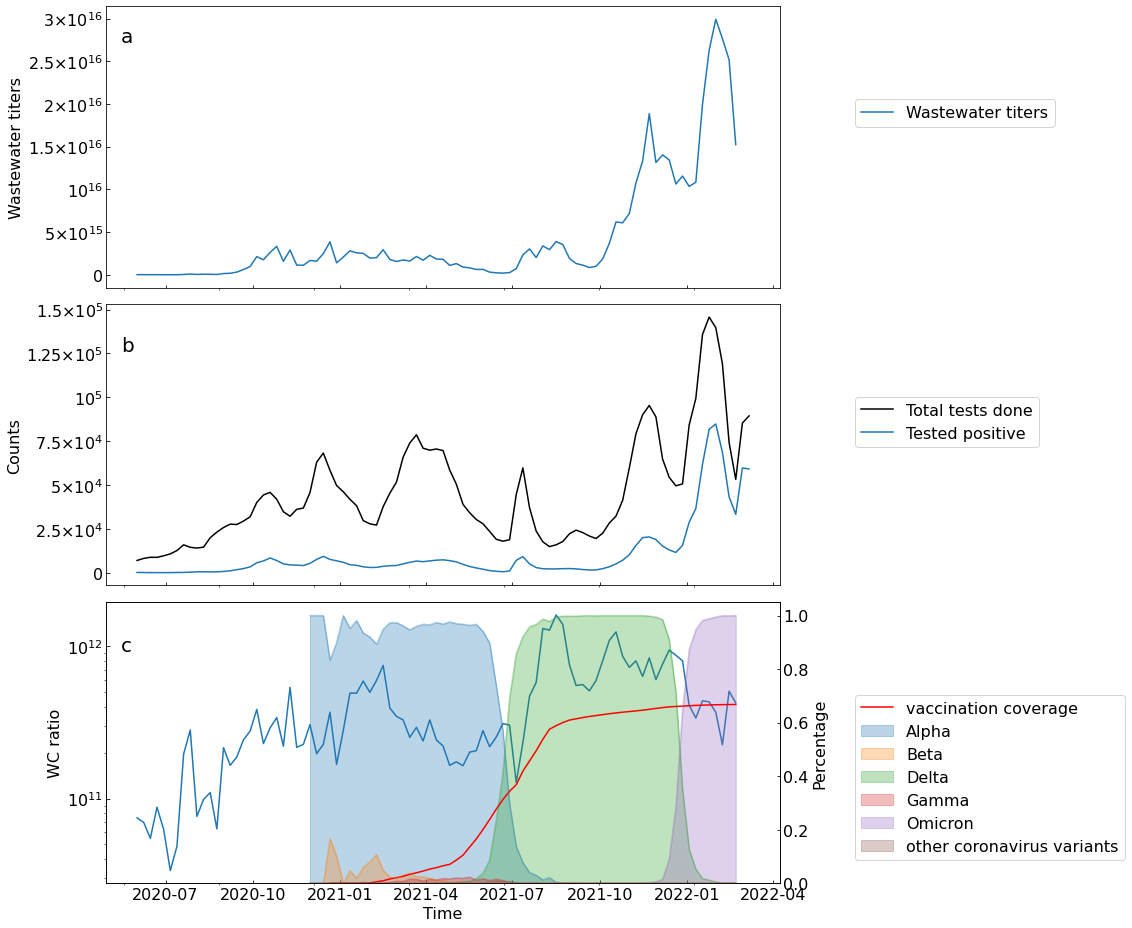

In [33]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,13),sharex=True)
sns.lineplot(data=submerge_removenan, x='strdate',y='RNA_flow_per_100000_Count',ax=ax1,color='#1f77b4',label='Wastewater titers')
ax1.set_ylabel('Wastewater titers\n per 100000 count')


sns.lineplot(data=submerge_removenan, x='strdate',y='Tested_with_result',ax=ax2,color='black',label='Total tests done')
sns.lineplot(data=submerge_removenan, x='strdate',y='Tested_positive',color='#1f77b4', ax=ax2, label='Tested positive') # #00008b
ax2.set_ylabel('Tests with a result \n and a positive result')
handles, labels = ax2.get_legend_handles_labels()

sns.lineplot(data=submerge_removenan, x='strdate',
             y='WC_ratio', ax=ax3, color='#1f77b4')
             
ax6 = ax3.twinx()
sns.lineplot(data=submerge_removenan, x='strdate', y='percentage_accum_total_administered_2jabs',
             ax=ax6, color='r', label='vaccination coverage')
ax6.yaxis.tick_right()
ax6.set_ylabel('Percentage', fontsize=16)

df_variant_agg_week_pivot_v2.plot(kind='area',stacked=False,ax=ax6,alpha=0.3)

ax1.legend(bbox_to_anchor=(1.1,0.7),fontsize=16)
ax2.legend(bbox_to_anchor=(1.1,0.7),fontsize=16)
ax6.legend(bbox_to_anchor=(1.1, 0.7),fontsize=16)

ax3.set_yscale('log')
ax3.set_xlabel('Time', fontsize=16)

ax1.set_ylabel('Wastewater titers',fontsize=16)
ax2.set_ylabel('Counts', fontsize=16)
ax3.set_ylabel('WC ratio', fontsize=16)

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(g))
ax2.get_yaxis().set_major_formatter(mticker.FuncFormatter(g))
ax3.get_yaxis().set_major_formatter(mticker.FuncFormatter(g))

for ax in [ax1,ax2,ax3,ax6]:
    ax.tick_params(axis='both', labelsize=16, direction="in")

plt.figtext(0.1, 0.3, 'c',fontsize=20)
plt.figtext(0.1, 0.62, 'b',fontsize=20)
plt.figtext(0.1, 0.95, 'a',fontsize=20)

plt.tight_layout()
#plt.savefig('plots/final.v6.png',dpi=300)
